In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv("bitcoin.csv")
x = df["Open"]
y = df["Close"]

In [54]:
def simple_linear_regression(x, y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    b1_num = ((x - x_mean) * (y - y_mean)).sum()
    b1_den = ((x - x_mean)**2).sum()
    b1 = b1_num / b1_den

    b0 = y_mean - (b1*x_mean)

    reg_line = 'y = {} + {}β'.format(b0, round(b1, 3))

    return (b0, b1, reg_line)

In [55]:
def corr_coef(x, y):
    N = len(x)

    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [56]:
b0, b1, reg_line = simple_linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 13.454248036467106 + 1.0β
Correlation Coef.:  0.9988783752424294
"Goodness of Fit":  0.9977580085269556


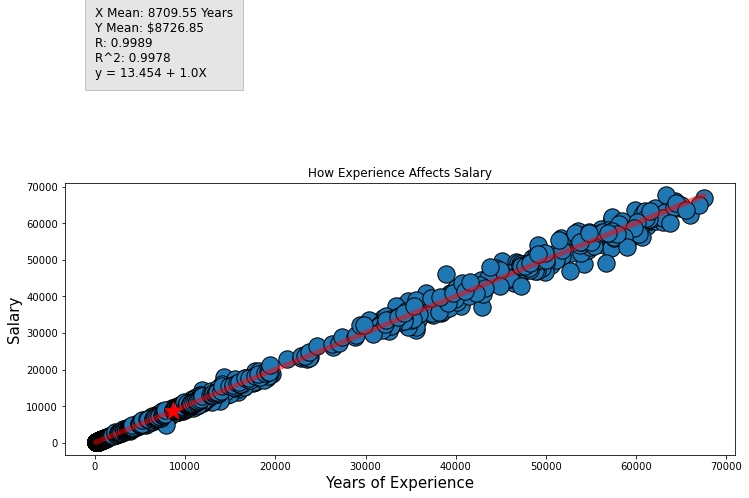

In [57]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2),
                       round(y.mean(), 2),
                       round(R, 4),
                       round(R**2, 4),
                       round(b0, 3),
                       round(b1, 3))
plt.text(x=1, y=100000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Experience Affects Salary')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.plot(x, b0 + b1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

In [58]:
def predict(b0, b1, new_x):
    y = b0 + b1 * new_x
    return y